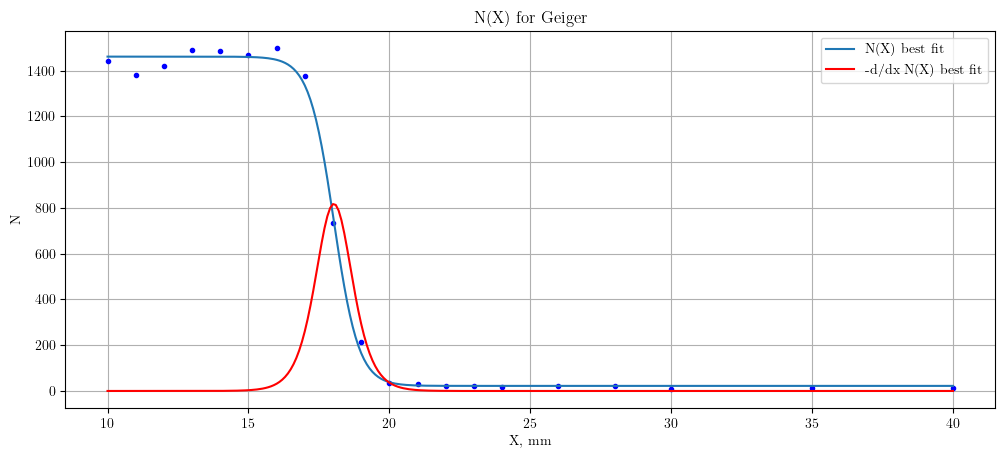

18.031919659871235


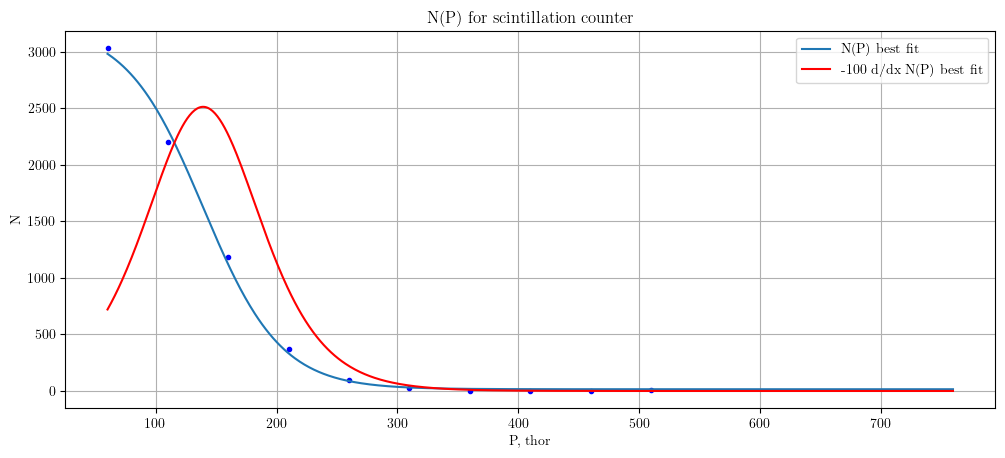

139.1488882695263

In [70]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

X = np.array([40, 35, 30, 28, 26, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10])
N = np.array([14.7, 12.4, 10.6, 20.9, 21.8, 18.5, 21.4, 23.0, 29.2, 34.9, 214.4, 735.3, 1376.5, 1500.0, 1467.9, 1486.7, 1491.3, 1421.8, 1380.5, 1440.8])

def approx_fn(x, x0, dx, A1, A2) :
    exp_pow = (x-x0) / dx
    return (exp_pow < 10) * (A1 - A2) / (1 + np.exp(exp_pow)) + A2

dx_handpicked = 32

def approx_fn_simplified(x, x0, A1, A2) :
    return approx_fn(x, x0, dx_handpicked, A1, A2)

def approx_fn_deriv(x, x0, dx, A1, A2) :
    exp_pow = (x-x0) / dx
    return (exp_pow < 10) * -(A1 - A2) / dx * np.exp(exp_pow) / ((1 + np.exp(exp_pow)) ** 2)

[opt, cov] = curve_fit(approx_fn, X, N)
[x0, dx, A1, A2] = opt

plt.figure(figsize=[12, 5], dpi=100)
plt.plot(X, N, 'b.')
X = np.arange(start=10, stop=40.1, step=0.1)
plt.plot(X, approx_fn(X, x0, dx, A1, A2), '-', label='N(X) best fit')
plt.plot(X, -approx_fn_deriv(X, x0, dx, A1, A2), 'r-', label='-d/dx N(X) best fit')

plt.xlabel('X, mm')
plt.ylabel('N')
plt.title('N(X) for Geiger')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid()

plt.show()

print(x0)

P = np.array([510, 460, 410, 360, 310, 260, 210, 160, 110, 60])
N = np.array([6, 4, 3, 2, 24, 96, 368, 1180, 2204, 3034])

[opt, cov] = curve_fit(approx_fn_simplified, P, N)
[P0, B1, B2] = opt
dP = dx_handpicked

plt.figure(figsize=[12, 5], dpi=100)
plt.plot(P, N, 'b.')
P = np.arange(start=60, stop=761, step=1)
plt.plot(P, approx_fn(P, P0, dP, B1, B2), '-', label='N(P) best fit')
plt.plot(P, -100 * approx_fn_deriv(P, P0, dP, B1, B2), 'r-', label='-100 d/dx N(P) best fit')

plt.xlabel('P, thor')
plt.ylabel('N')
plt.title('N(P) for scintillation counter')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid()

plt.show()

P0
